# Chargement des librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mylib.fonction_exploration import exploration1, exploration2, exploration3, exploration4
from mylib.fonction_pk import test_pk
from mylib.fonction_merge import df_merge
from mylib.fonction_acp import display_circles, display_factorial_planes, display_scree_plot
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
import seaborn as sns
from pandas_profiling import ProfileReport
import plotly.express as px
from IPython.display import display_html 

from sklearn.cluster import KMeans
from sklearn import decomposition
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import preprocessing
#from scipy.cluster.hierarchy import dendrogram
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering
# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

print("Version numpy : " + np.__version__)
print("Version pandas : " + pd.__version__)

bold = "\033[1m"
red = "\033[31m"
end = "\033[0;0m"

chemin = '../src/df_2014_cleaned.csv'

Version numpy : 1.23.5
Version pandas : 1.4.4


# Chargement du fichier nettoyé

In [2]:
p9 = pd.read_csv(chemin)

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Exploration

In [4]:
exploration1(p9)

,iso,Country,Population,Under-nourishment (%),HDI,Peace_index,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Production,Exportations,Importations,Customs duration (h),Customs tax (%),Distance (km),Gdp/cap,"Population evolution (4y, %)",Trade balance (exp-imp),Self-sufficiency (prod-dispo),"Market growth (2y, %)"
0,AFG,Afghanistan,32716210,20.700000,0.479000,3.346000,67.220000,0,2266000000,106000000,578000000,48.000000,6.950000,5500.665000,2110.829568,16.057434,-472000000,2.042301,450.476190
1,ZAF,South Africa,54729551,4.800000,0.712000,2.372000,174.070000,1,19303000000,3090000000,459000000,92.000000,6.310000,8769.679000,13556.032816,5.686269,2631000000,178.627942,-27.142857
2,ALB,Albania,2889104,5.000000,0.792000,1.937000,311.910000,1,1612000000,72000000,91000000,14.000000,1.250000,1499.451000,11260.998059,-0.821038,-19000000,246.048454,1.111111
,iso,Country,Population,Under-nourishment (%),HDI,Peace_index,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Production,Exportations,Importations,Customs duration (h),Customs tax (%),Distance (km),Gdp/cap,"Population evolution (4y, %)",Trade balance (exp-imp),Self-sufficiency (prod-dispo),"Market growth (2y, %)"
142,ECU,Ecuador,15957994,8.700000,0.760000,2.089000,98.050000,1,2760000000,98000000,330000000,96.000000,6.950000,9561.102000,11708.652997,6.460546,-232000000,74.904069,-24.829157
143,USA,United States,318386329,2.500000,0.919000,2.257000,191.280000,1,422841000000,60714000000,13503000000,1.500000,2.930000,7456.767000,55123.849787,2.928675,47211000000,1136.795239,0.558534
144,ETH,Ethiopia,99746766,15.900000,0.450000,2.367000,100.920000,1,15778000000,694000000,66000000,56.913460,18.150000,5368.907000,1488.625755,11.776373,628000000,57.260567,53.488372
,iso,Country,Population,Under-nourishment (%),HDI,Peace_index,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Production,Exportations,Importations,Customs duration (h),Customs tax (%),Distance (km),Gdp/cap,"Population evolution (4y, %)",Trade balance (exp-imp),Self-sufficiency (prod-dispo),"Market growth (2y, %)"
7,ARG,Argentina,42669500,2.500000,0.846000,2.019000,132.580000,1,40072000000,16883000000,68000000,21.000000,12.580000,10932.340000,19683.771506,4.611714,16815000000,806.545136,-9.333333
71,LBR,Liberia,4519398,36.800000,0.472000,1.906000,157.840000,1,729000000,0,16000000,193.000000,9.670000,4680.772000,1367.668463,12.424066,-16000000,3.464669,-40.740741


In [5]:
exploration2(p9)

,Nombre de valeurs totales,Type des données,Nombre de NaN,NaN en %,Nombre de valeurs uniques,Valeurs uniques en%
iso,145,object,0,0.00,145,100.00
Country,145,object,0,0.00,145,100.00
Population,145,int64,0,0.00,145,100.00
Under-nourishment (%),145,float64,0,0.00,78,53.79
HDI,145,float64,0,0.00,122,84.14
Peace_index,145,float64,0,0.00,137,94.48
Vegetables disponibility (kg/cap/year),145,float64,0,0.00,145,100.00
Enough veg intake (> 91.25 kg/cap/year),145,int64,0,0.00,2,1.38
Production,145,int64,0,0.00,145,100.00
Exportations,145,int64,0,0.00,111,76.55


In [6]:
exploration3(p9)


---------------------------------------
Nombre de lignes et de colonnes (shape)
--------------------------------------- 

(145, 19) 

--------------------------------------
Affichage des NaN (isna().any(axis=1))
-------------------------------------- 

Empty DataFrame
Columns: [iso, Country, Population, Under-nourishment (%), HDI, Peace_index, Vegetables disponibility (kg/cap/year), Enough veg intake (> 91.25 kg/cap/year), Production, Exportations, Importations, Customs duration (h), Customs tax (%), Distance (km), Gdp/cap, Population evolution (4y, %), Trade balance (exp-imp), Self-sufficiency (prod-dispo), Market growth (2y, %)]
Index: [] 

---------------------------------------
Nombre de doublons (duplicated().sum())
--------------------------------------- 

0 

-----------------------------------------------------
Affichage des doublons (df[df.duplicated()].head(10))
----------------------------------------------------- 

Empty DataFrame
Columns: [iso, Country, Population, Under-

In [7]:
exploration4(p9)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
iso,145,145,AFG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,145,145,Afghanistan,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Population,145.00,NaN,NaN,NaN,48798539.26,160979853.45,327386.00,4798734.00,10892413.00,34248603.00,1371860000.00
Under-nourishment (%),145.00,NaN,NaN,NaN,9.34,9.41,2.50,2.50,5.40,13.30,47.90
HDI,145.00,NaN,NaN,NaN,0.71,0.16,0.37,0.57,0.73,0.84,0.95
Peace_index,145.00,NaN,NaN,NaN,2.03,0.43,1.14,1.77,2.03,2.29,3.35
Vegetables disponibility (kg/cap/year),145.00,NaN,NaN,NaN,193.77,93.65,37.12,128.05,171.75,243.16,470.33
Enough veg intake (> 91.25 kg/cap/year),145.00,NaN,NaN,NaN,0.90,0.30,0.00,1.00,1.00,1.00,1.00
Production,145.00,NaN,NaN,NaN,21089558620.69,88440736192.84,13000000.00,1116000000.00,3381000000.00,12249000000.00,946127000000.00
Exportations,145.00,NaN,NaN,NaN,2103544827.59,6443566754.03,0.00,20000000.00,117000000.00,721000000.00,60714000000.00


In [8]:
p9.sample()

,iso,Country,Population,Under-nourishment (%),HDI,Peace_index,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Production,Exportations,Importations,Customs duration (h),Customs tax (%),Distance (km),Gdp/cap,"Population evolution (4y, %)",Trade balance (exp-imp),Self-sufficiency (prod-dispo),"Market growth (2y, %)"
76,MWI,Malawi,16477966,15.40,0.49,1.78,405.28,1,16145000000,33000000,39000000,85.12,9.06,7492.12,1513.43,11.95,-6000000,574.51,550.00


# Vérification des outliers en prévision de l'ACP

In [9]:
# on détermine les colonnes numériques
num = []
for i in p9.columns:
    if p9[i].dtypes == int or p9[i].dtypes == float:
        num.append(i)

## Z-score

In [10]:
# on calcule le z-score sur toutes les variables numériques
for i in num:
    p9.sort_values(by=i, inplace=True)
    outlier_z = p9[stats.zscore(p9[i]) > 1.96]
    nb_outlier_z = len(outlier_z)
    print(bold + f"\n{i} : {nb_outlier_z} outliers \n\n" + end + f"{outlier_z[['Country', i]]} \n" + "-" * 50)


Population : 2 outliers 

   Country  Population
53   India  1307246509
26   China  1371860000 
--------------------------------------------------

Under-nourishment (%) : 7 outliers 

                      Country  Under-nourishment (%)
112          Congo, Dem. Rep.                  35.10
107                    Rwanda                  35.10
71                    Liberia                  36.80
74                 Madagascar                  37.60
137               Yemen, Rep.                  38.10
50                      Haiti                  42.60
108  Central African Republic                  47.90 
--------------------------------------------------

HDI : 0 outliers 

Empty DataFrame
Columns: [Country, HDI]
Index: [] 
--------------------------------------------------

Peace_index : 5 outliers 

                      Country  Peace_index
112          Congo, Dem. Rep.         3.09
41         Russian Federation         3.11
96                   Pakistan         3.13
108  Central Afr

## Log

In [11]:
p9_log = p9.copy()
p9_log = p9_log.set_index(['Country'])
p9_log = p9_log[num]
p9_log.sample()

,Population,Under-nourishment (%),HDI,Peace_index,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Production,Exportations,Importations,Customs duration (h),Customs tax (%),Distance (km),Gdp/cap,"Population evolution (4y, %)",Trade balance (exp-imp),Self-sufficiency (prod-dispo),"Market growth (2y, %)"
Country,,,,,,,,,,,,,,,,,
Central African Republic,4798734,47.90,0.37,3.24,291.49,1,1410000000,0,15000000,141.40,15.97,4881.04,670.10,2.98,-15000000,2.34,50.00


### Graphiques de distribution

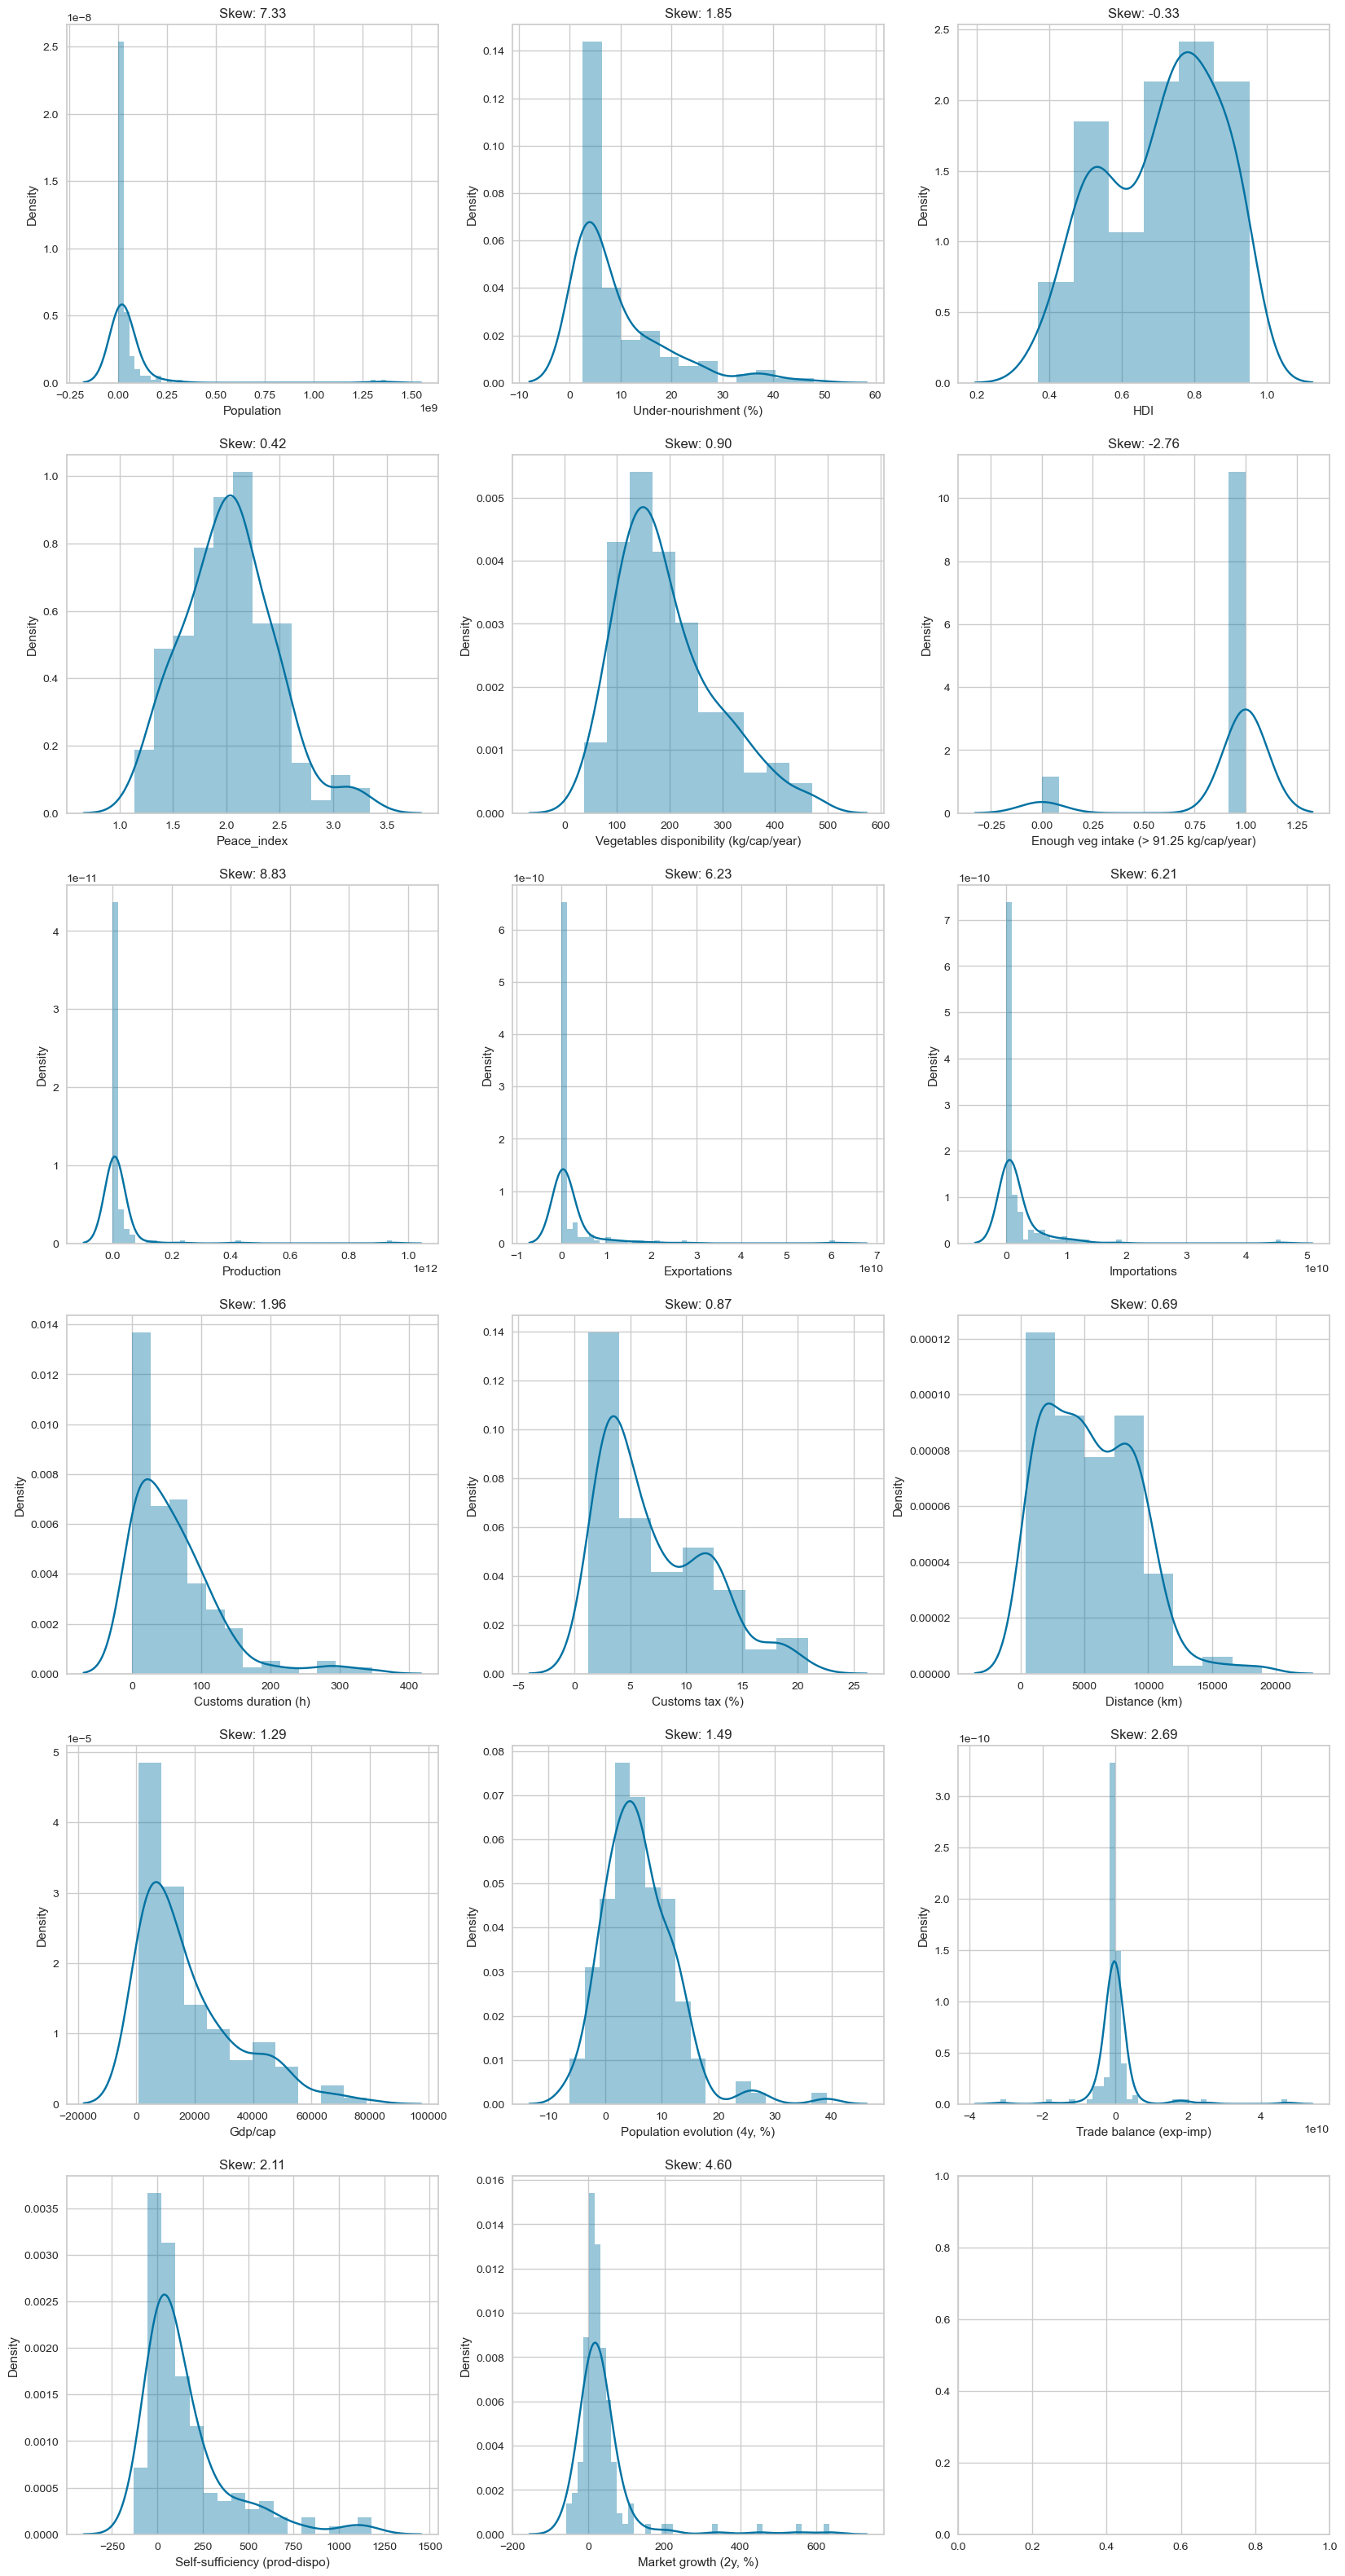

In [12]:
f, a = plt.subplots(6, 3, figsize=(20,40))
a = a.flatten()
for i, col in enumerate(p9_log.columns):
    sns.distplot(p9_log[col], ax=a[i], kde= True).set_title('Skew: {:.2f}'.format(p9_log[col].skew()))
plt.show()

### Calcul de Skew et Kurtosis

In [13]:
#Calculating Skew and Kurtosis 
for i in p9_log.columns:
    kurtosis = round((stats.kurtosis(p9_log[i])), ndigits=2)
    skew = round((stats.skew(p9_log[i])), ndigits=2)
    #print("\nkurtosis :", i, kurtosis) 
    #print("skew", i, skew, "\n")
    print("\n" + "-" * 50 + bold + f"\n{i} : kurtosis {kurtosis}" + end)
    print(bold + f"{i} : skew {skew} \n" + end)
#Interpreting Kurtosis
    if  -0.5 < kurtosis < 0.5:
        print (f'A kurtosis of {kurtosis} means the distribution is approximately normal sometimes called mesokurtic distributions')
    elif kurtosis <= -0.5: 
        print (f'A kurtosis of {kurtosis} means the distribution is light-tailed (negative) sometimes called a platykurtic distributions')
    elif kurtosis >= 0.5:
        print (f'A kurtosis of {kurtosis} means the distribution is heavy-tailed (positive) sometimes called a leptokurtic distribution')
#Interpreting Skewness
    if -0.5 < skew < 0.5:
        print (f'A skew of {skew} means the distribution is approx. symmetric')
    elif  -1 < skew < -0.5 or 0.5 < skew < 1.0:
        print (f'A skew of {skew} means the distribution is moderately skewed')
    else:
        print (f'A skew of {skew} means the distribution is highly skewed')


--------------------------------------------------
Population : kurtosis 55.12
Population : skew 7.26 

A kurtosis of 55.12 means the distribution is heavy-tailed (positive) sometimes called a leptokurtic distribution
A skew of 7.26 means the distribution is highly skewed

--------------------------------------------------
Under-nourishment (%) : kurtosis 3.19
Under-nourishment (%) : skew 1.83 

A kurtosis of 3.19 means the distribution is heavy-tailed (positive) sometimes called a leptokurtic distribution
A skew of 1.83 means the distribution is highly skewed

--------------------------------------------------
HDI : kurtosis -1.01
HDI : skew -0.32 

A kurtosis of -1.01 means the distribution is light-tailed (negative) sometimes called a platykurtic distributions
A skew of -0.32 means the distribution is approx. symmetric

--------------------------------------------------
Peace_index : kurtosis 0.32
Peace_index : skew 0.42 

A kurtosis of 0.32 means the distribution is approximately 

### Test de normalité

In [14]:
# calculate
for i in p9_log.columns:
    stat, p = stats.normaltest(p9_log[i])
    print (bold + f'{i}' + end + f': \nStatistic={stat}, p={p}')
   # print ('--'*25) 

# interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
        print ('--'*25) 
    else:
        print('Sample does not look Gaussian (reject H0)')
        print ('--'*25) 

Population: 
Statistic=236.42813800962338, p=4.573852423542795e-52
Sample does not look Gaussian (reject H0)
--------------------------------------------------
Under-nourishment (%): 
Statistic=61.07459992011894, p=5.467882018212063e-14
Sample does not look Gaussian (reject H0)
--------------------------------------------------
HDI: 
Statistic=26.425639237017105, p=1.8270286148074313e-06
Sample does not look Gaussian (reject H0)
--------------------------------------------------
Peace_index: 
Statistic=5.383736350876783, p=0.06775424424929814
Sample looks Gaussian (fail to reject H0)
--------------------------------------------------
Vegetables disponibility (kg/cap/year): 
Statistic=17.31851703560246, p=0.00017351291595538943
Sample does not look Gaussian (reject H0)
--------------------------------------------------
Enough veg intake (> 91.25 kg/cap/year): 
Statistic=95.52431788432784, p=1.8078314095845743e-21
Sample does not look Gaussian (reject H0)
--------------------------------

In [15]:
#pip install outliers

In [16]:
#import numpy as np
#from OUTLIERS import smirnov_grubbs as grubbs

#grubbs.max_test(p9.Population, alpha=.01)

### Mise en log des colonnes éligibles

In [17]:
p9.columns

Index(['iso', 'Country', 'Population', 'Under-nourishment (%)', 'HDI',
       'Peace_index', 'Vegetables disponibility (kg/cap/year)',
       'Enough veg intake (> 91.25 kg/cap/year)', 'Production', 'Exportations',
       'Importations', 'Customs duration (h)', 'Customs tax (%)',
       'Distance (km)', 'Gdp/cap', 'Population evolution (4y, %)',
       'Trade balance (exp-imp)', 'Self-sufficiency (prod-dispo)',
       'Market growth (2y, %)'],
      dtype='object')

In [18]:
# Data varies in several magnitudes and has both positive, zero and negative numbers  
# log modulus transform 
log_columns = ['Population', 'Under-nourishment (%)', 'Vegetables disponibility (kg/cap/year)',
              'Production', 'Exportations', 'Importations', 'Customs duration (h)', 'Customs tax (%)',
               'Distance (km)', 'Gdp/cap', 'Trade balance (exp-imp)', 'Population evolution (4y, %)',
               'Self-sufficiency (prod-dispo)', 'Market growth (2y, %)']
for i in log_columns:
    p9_log[i] = np.sign(p9_log[i])*(np.log10(np.abs(p9_log[i])+1))
    
p9_log

,Population,Under-nourishment (%),HDI,Peace_index,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Production,Exportations,Importations,Customs duration (h),Customs tax (%),Distance (km),Gdp/cap,"Population evolution (4y, %)",Trade balance (exp-imp),Self-sufficiency (prod-dispo),"Market growth (2y, %)"
Country,,,,,,,,,,,,,,,,,
Ghana,7.45,0.91,0.60,1.80,2.66,1,10.45,7.69,8.13,2.04,1.13,3.65,3.73,1.05,-7.93,2.73,-1.77
Timor-Leste,6.07,1.42,0.62,1.77,2.18,1,8.27,0.00,6.60,1.99,0.54,4.12,3.43,0.99,-6.60,0.89,-1.75
Guinea-Bissau,6.24,1.26,0.47,2.47,1.72,0,7.97,0.00,6.70,2.08,1.16,3.63,3.13,1.09,-6.70,0.54,-1.66
Uganda,7.56,1.26,0.51,2.21,2.37,1,10.00,8.40,7.66,1.93,1.12,3.77,3.33,1.13,8.31,1.64,-1.62
Liberia,6.66,1.58,0.47,1.91,2.20,1,8.86,0.00,7.20,2.29,1.03,3.67,3.14,1.13,-7.20,0.65,-1.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,7.96,0.98,0.68,1.83,2.27,1,10.52,10.06,9.73,1.79,0.88,4.00,3.86,0.73,9.78,2.25,2.32
Myanmar,7.71,0.79,0.55,2.29,2.09,1,10.08,9.26,7.34,2.16,0.76,3.94,3.61,0.64,9.25,2.06,2.53
Afghanistan,7.51,1.34,0.48,3.35,1.83,0,9.36,8.03,8.76,1.69,0.90,3.74,3.32,1.23,-8.67,0.48,2.65


## **Boxplots**

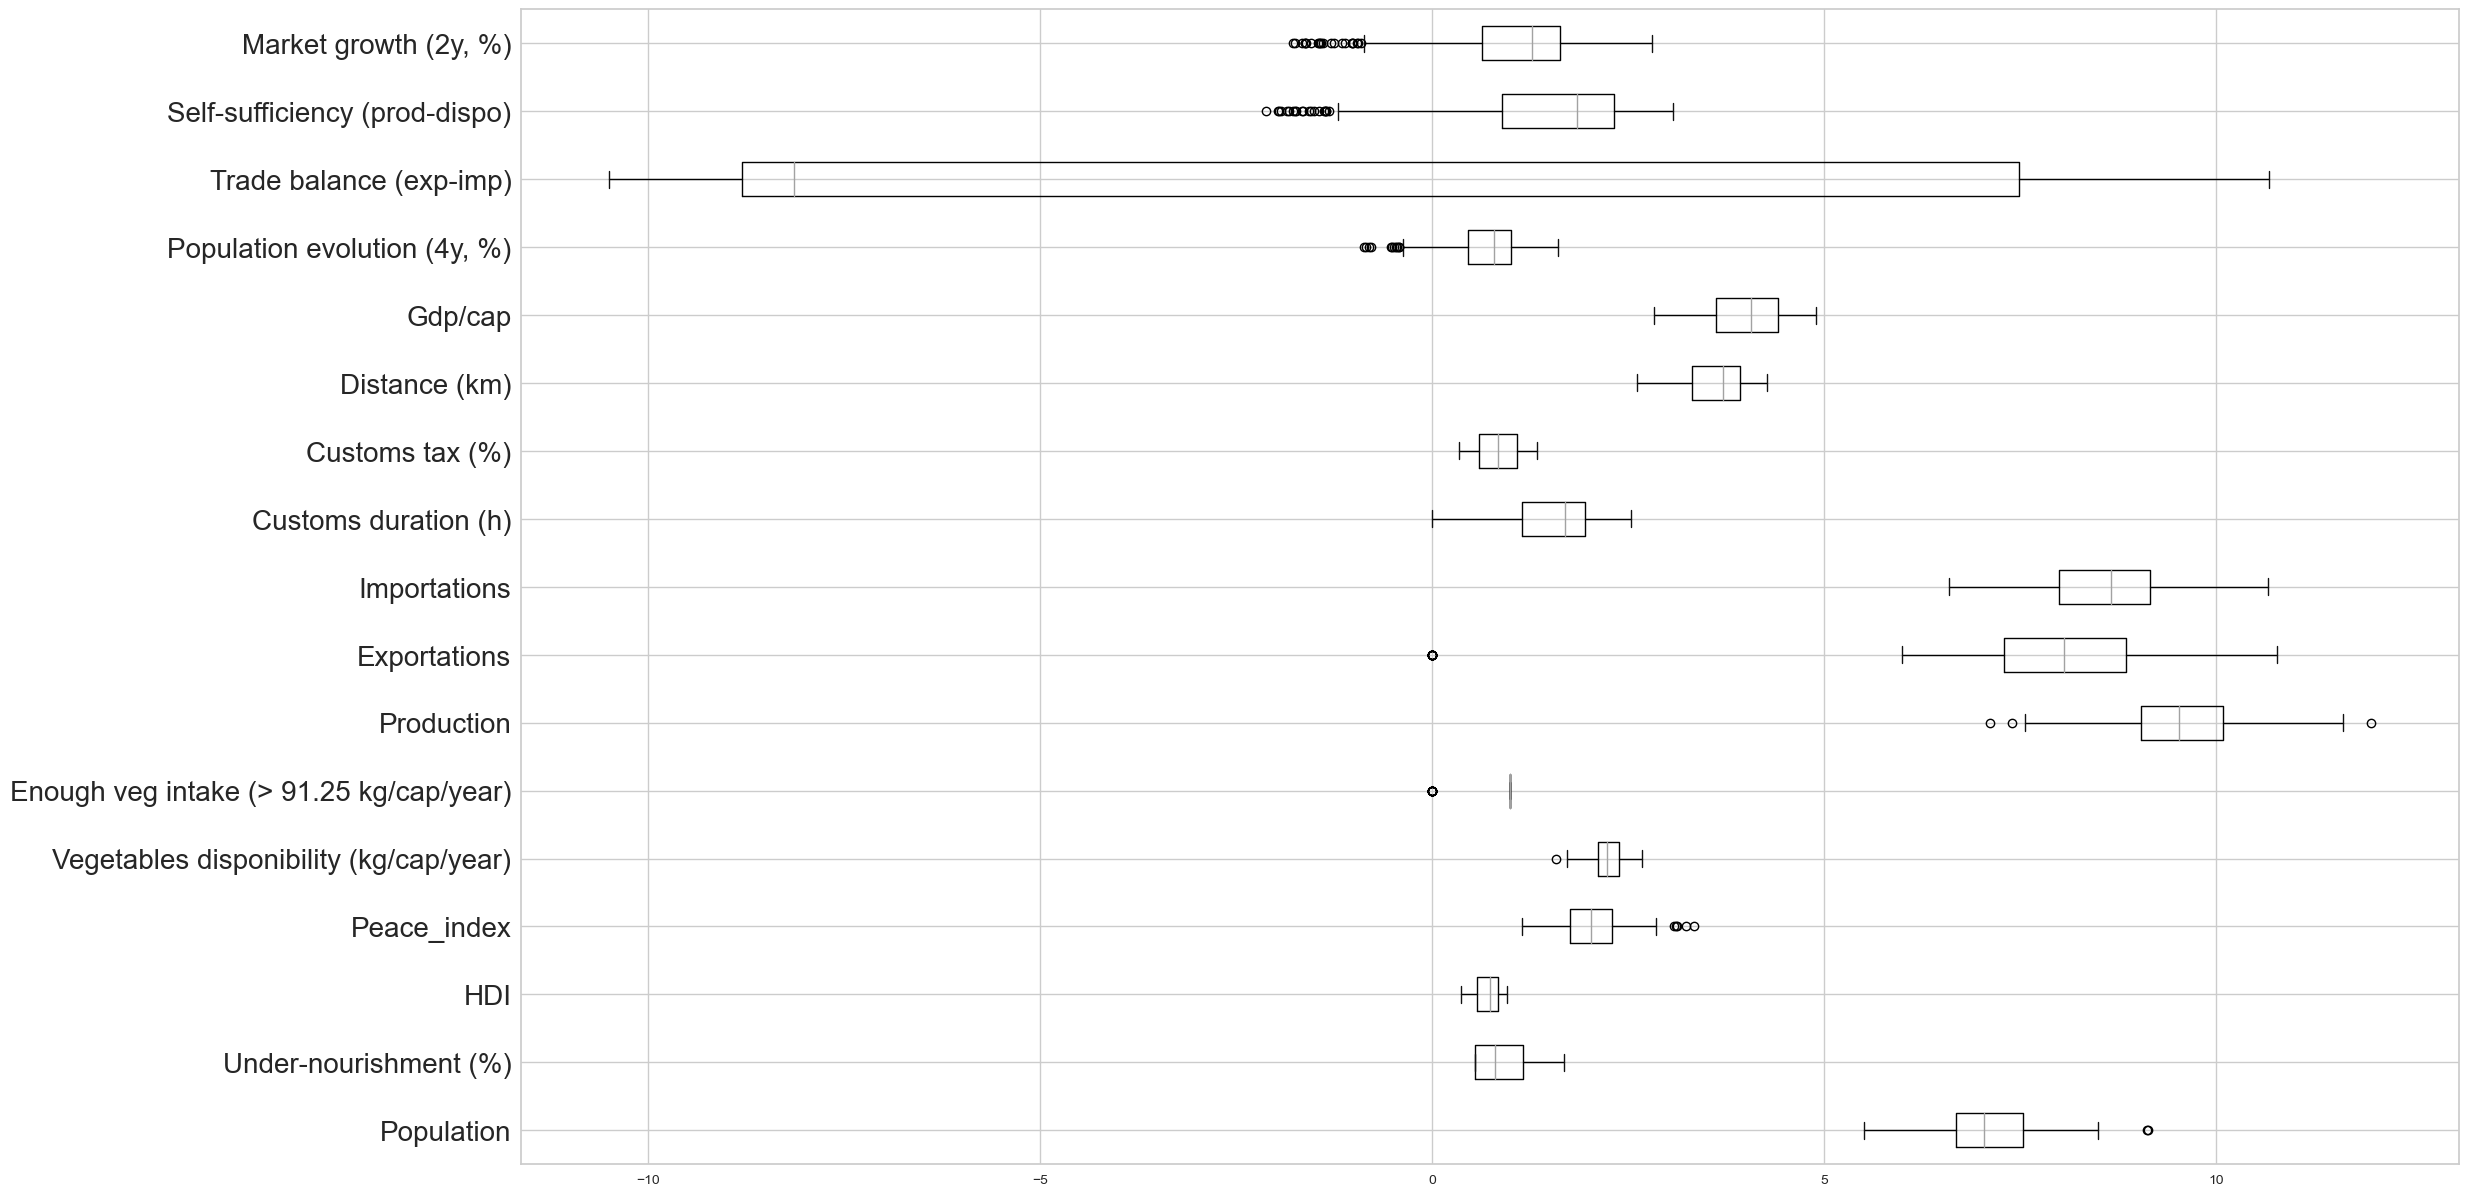

In [19]:
# création boxplots
fig=plt.figure(figsize=(25,15))
p9_log.boxplot(vert=False)
plt.yticks(size=20)
plt.show()

In [20]:
#pd.options.display.max_rows = None

# Vérification des corrélations

<span style="color:red">**Les distributions des variables n'étant pas toutes normales, nous allons utiliser le test de Spearman pour avoir un aperçu des corrélations**</span>

## Corrélation de Spearman

In [21]:
corr = p9_log.corr(method='spearman')
#corr

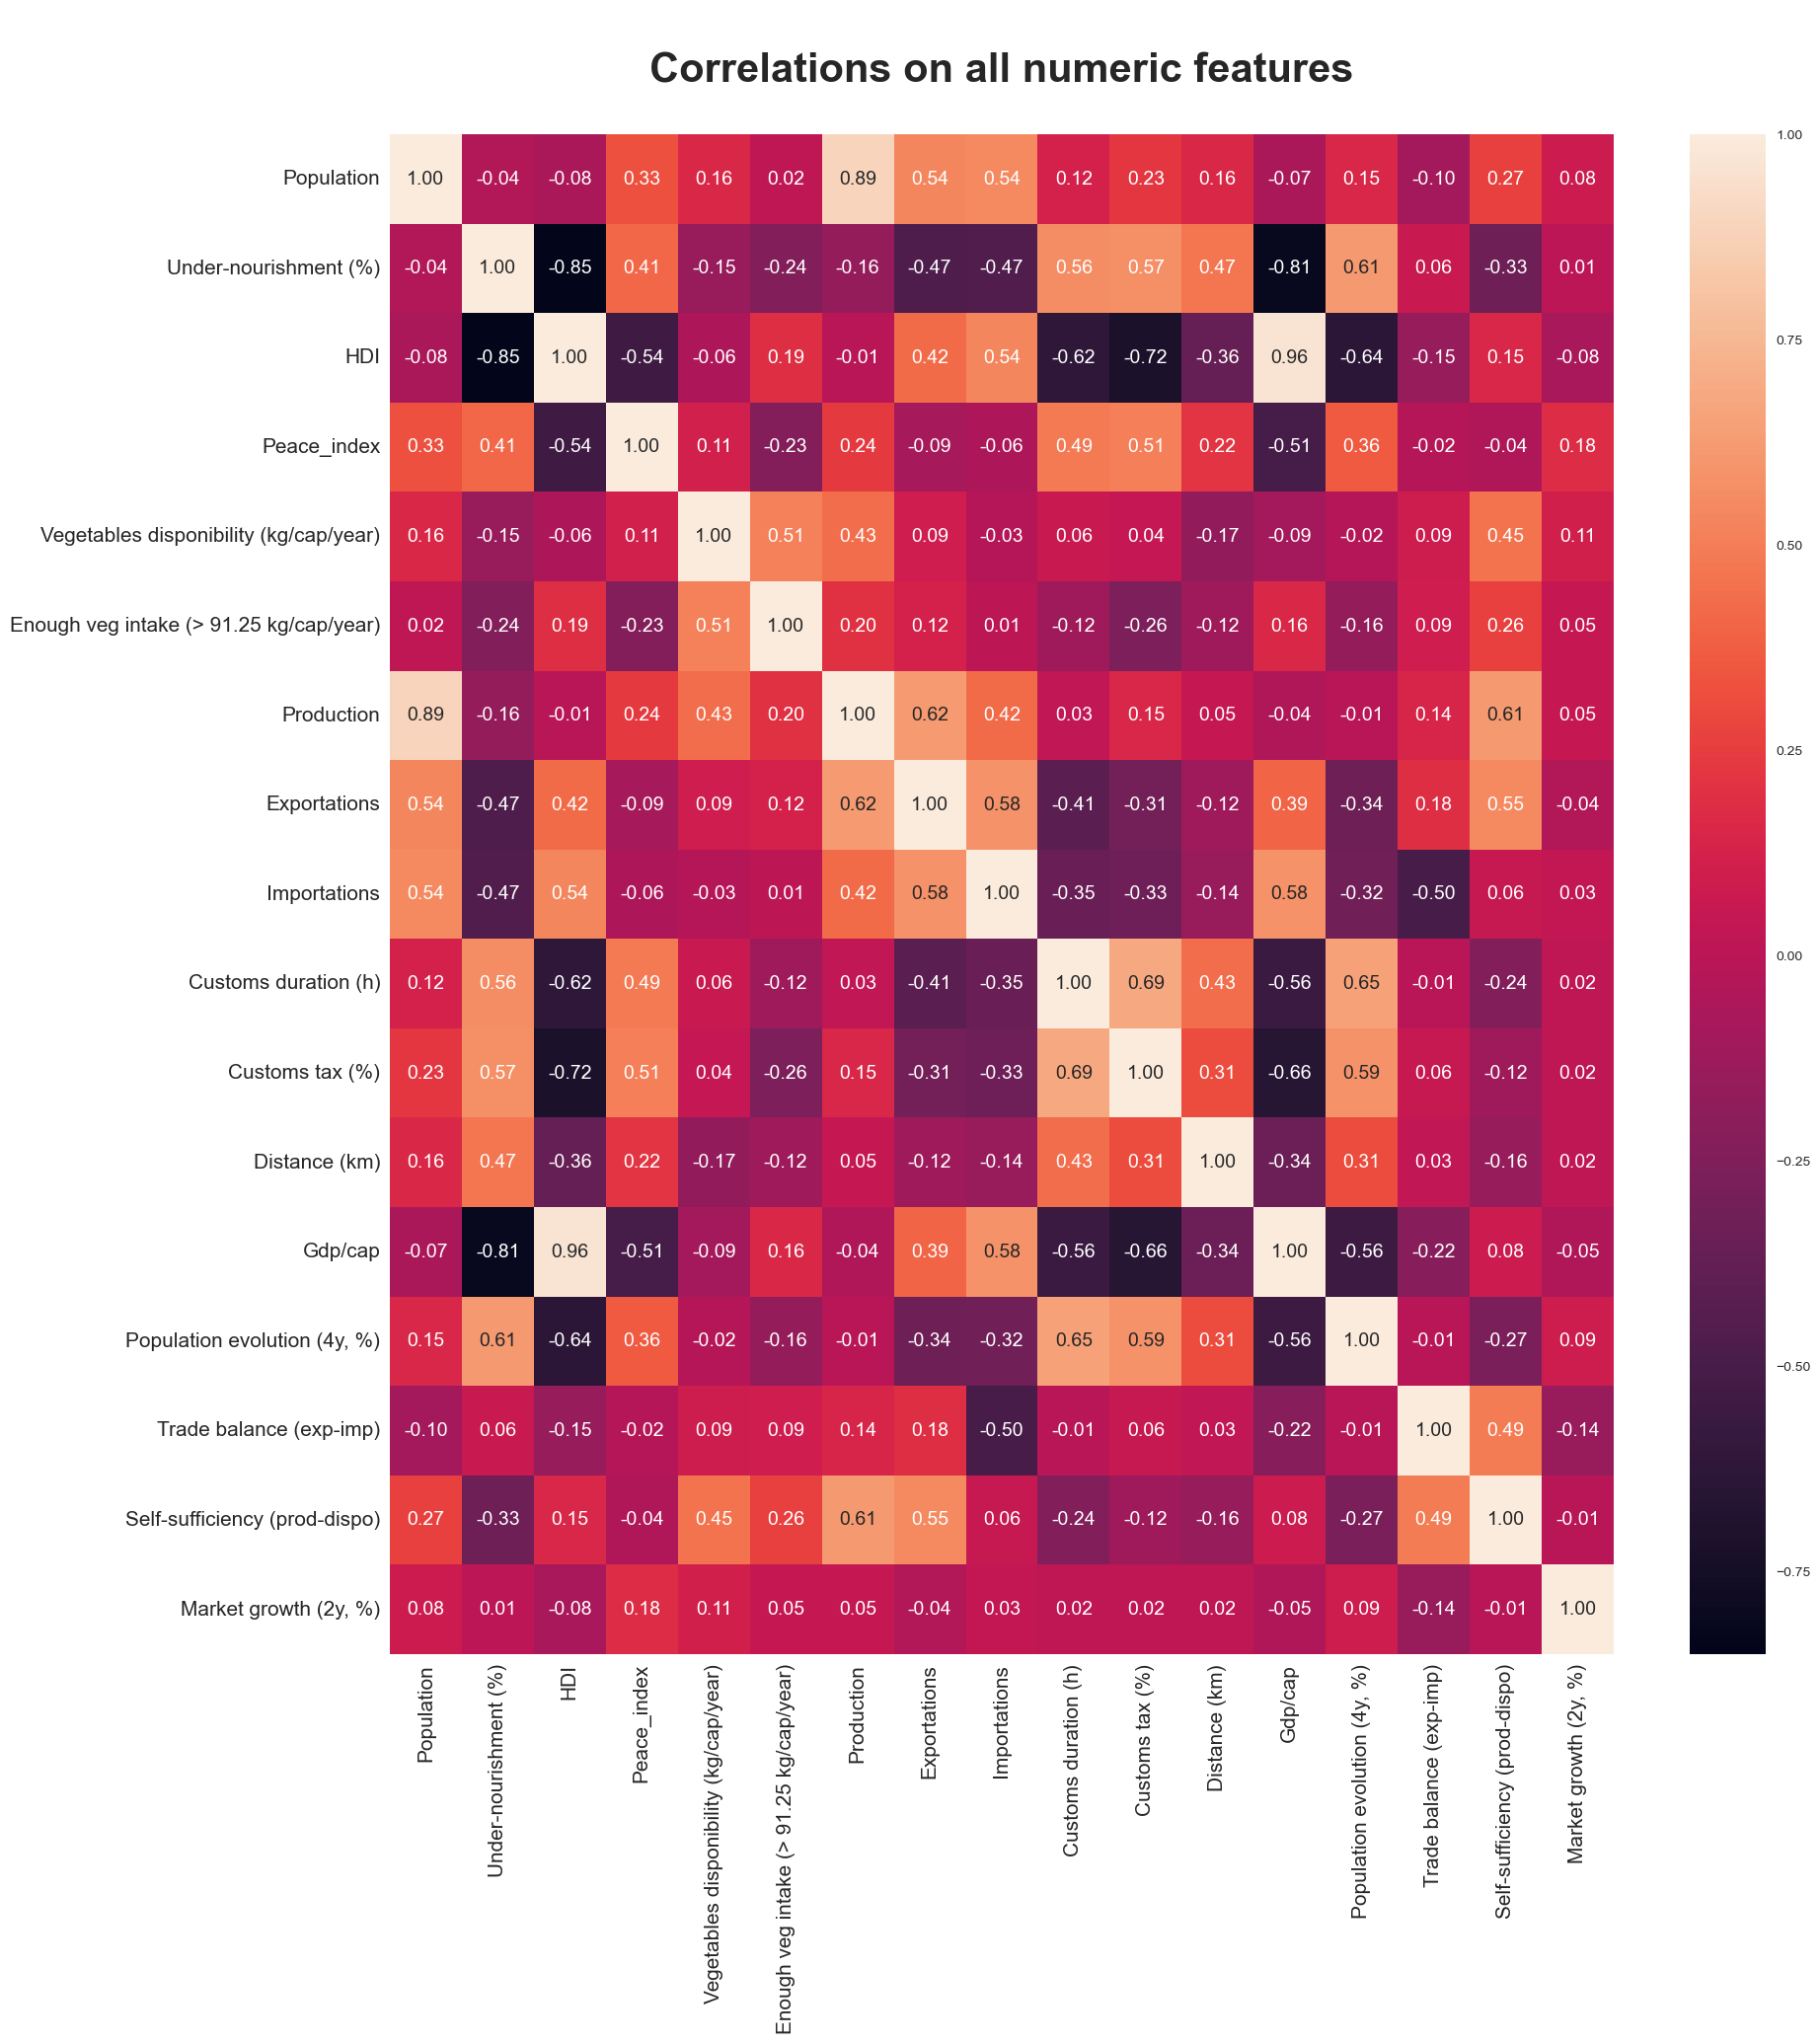

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(p9_log.corr(method='spearman'), annot=True, annot_kws={"size": 14}, fmt=".2f")
plt.xticks(size=15)
plt.yticks(size=15)
plt.title("\nCorrelations on all numeric features\n", size=30, fontweight='bold' )
plt.show()

''

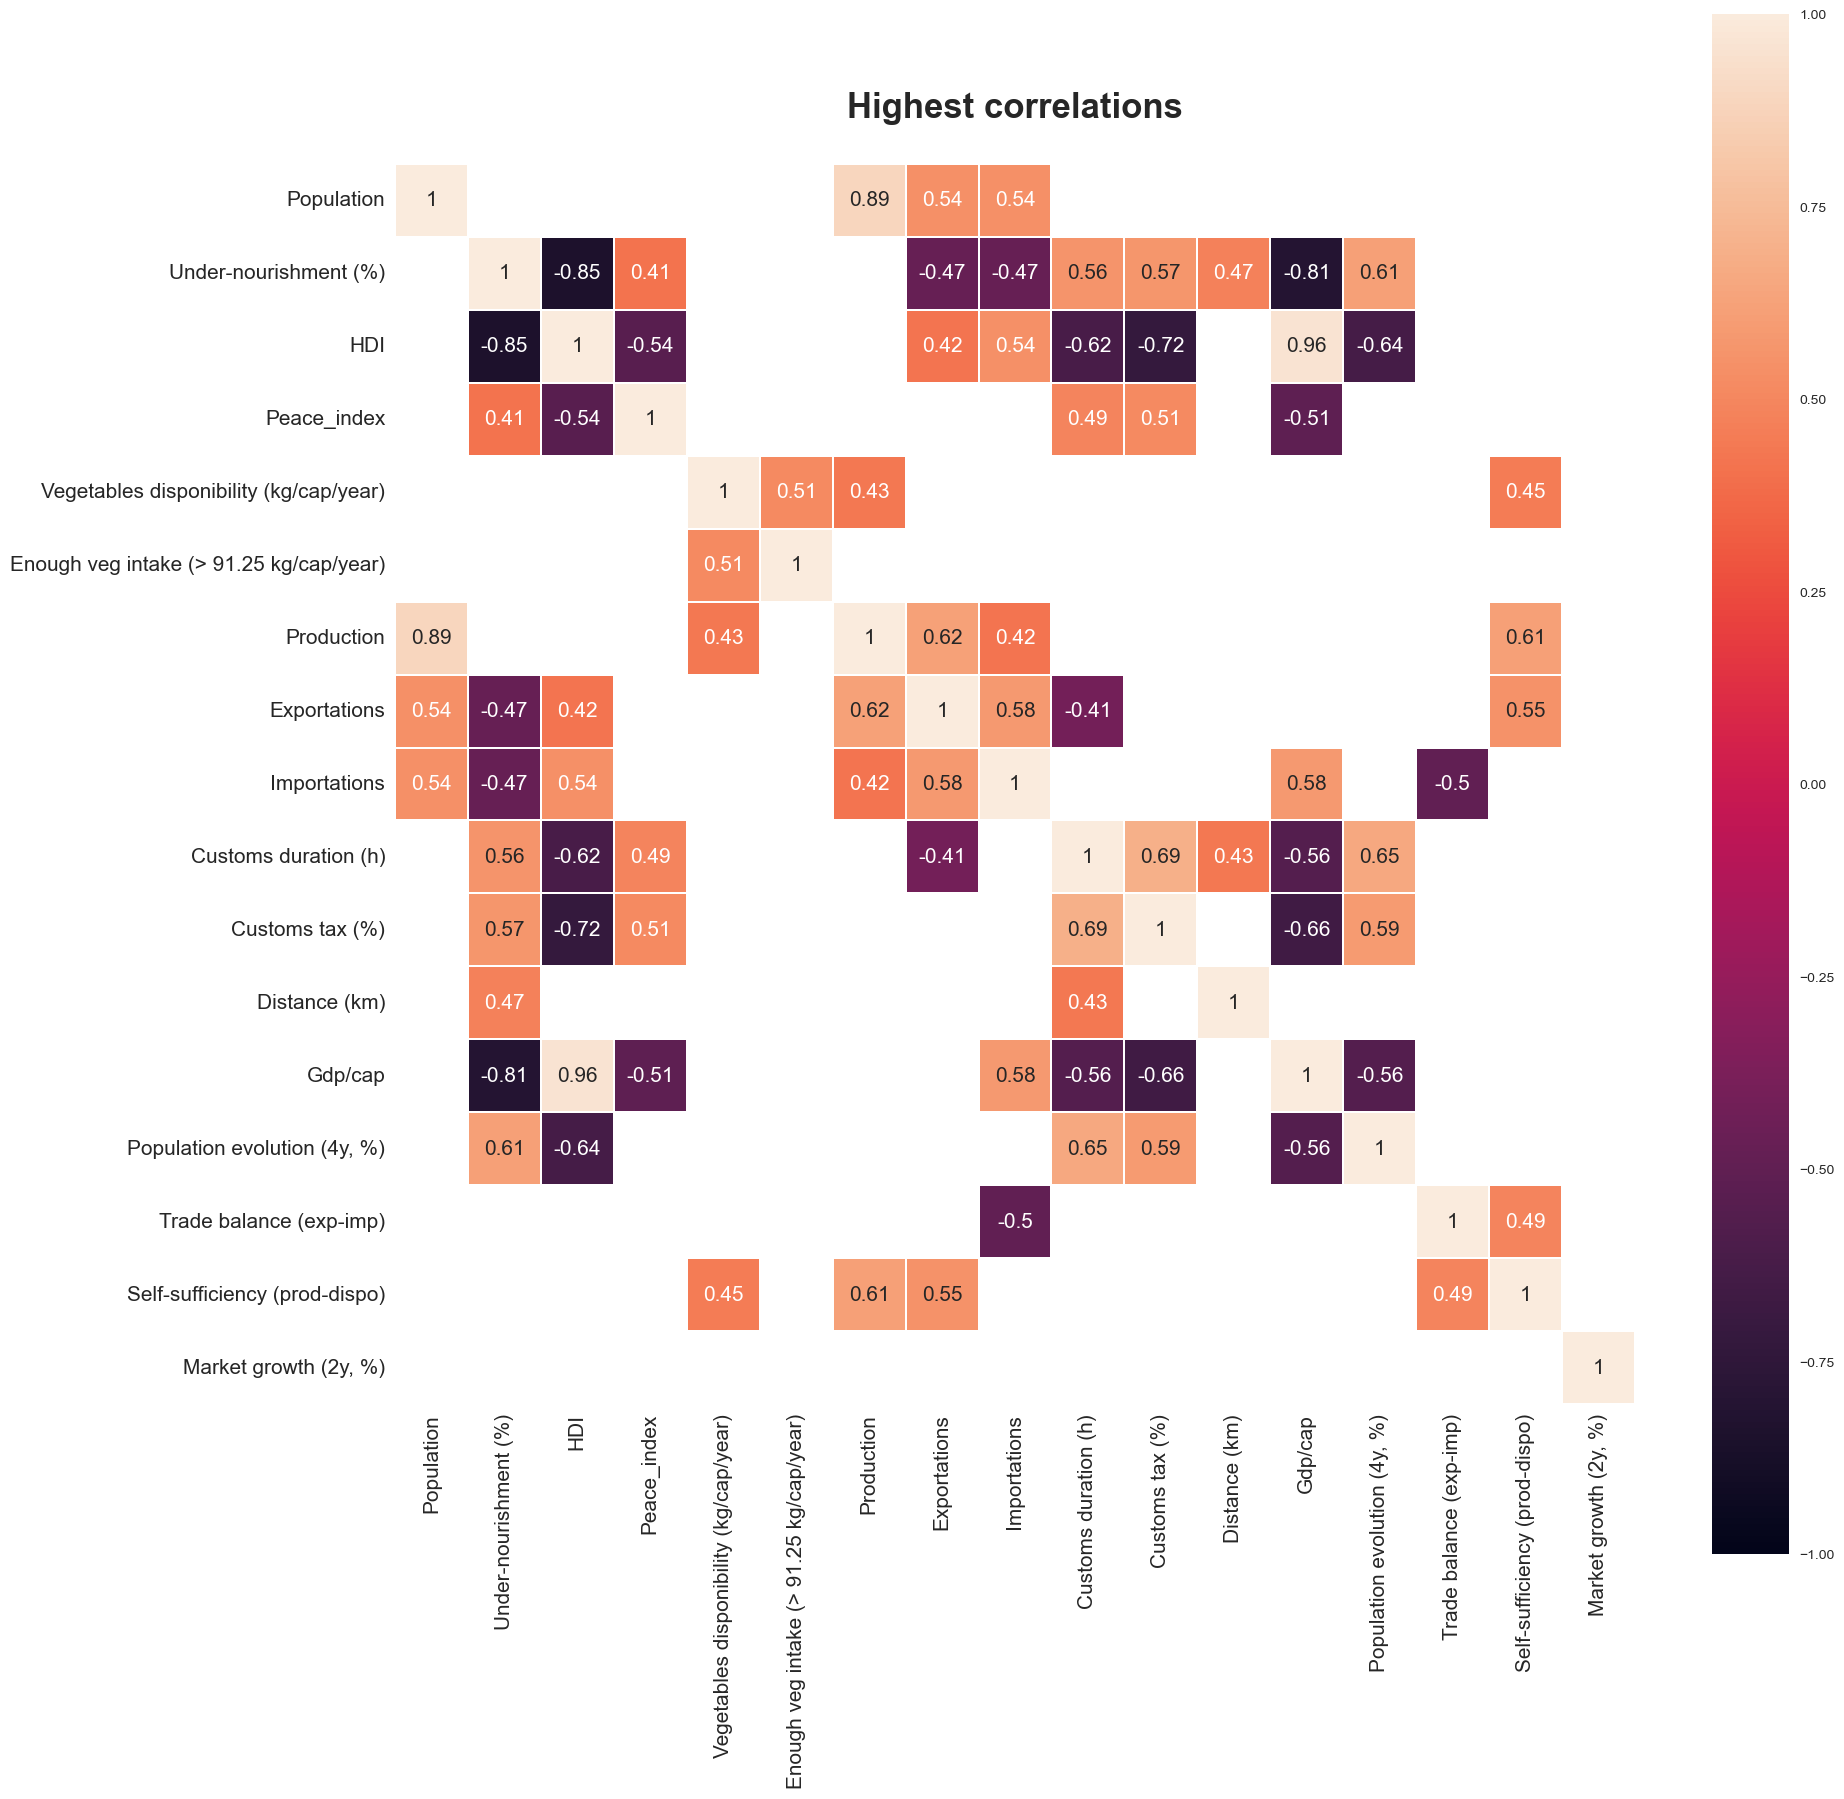

In [23]:
# Beaucoup d'informations, on va visualiser les corrélations les plus élevées
plt.figure(figsize=(20, 20))
sns.heatmap(np.round(corr, 2)[(corr >= 0.4) | (corr <= -0.4)], 
            vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 15}, square=True)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title("\nHighest correlations\n", size=25, fontweight='bold' )
;

# Visionnage du DataFrame final (log) avant analyse

In [24]:
cell_hover = {
    "selector": "td:hover",
    "props": [("background-color", "#FFFFE0")]
}
index_names = {
    "selector": ".index_name",
    "props": "background-color: #DC7633; font-style: italic; color: white; font-weight:normal;"
}
headers = {
    "selector": "th:not(.index_name)",
    "props": "background-color: #DC7633; color: white; text-align: center"
}

properties = {"border": "1px solid black", "width": "90px", "text-align": "center"}

styles = [dict(selector="caption",
                       props=[("text-align", "center"),
                              ("font-size", "150%"),
                              ("color", 'black')])]

p9_log.head(50).style.format(precision=2).highlight_max(axis=0, props='color:white; font-weight:bold; background-color:darkblue;').set_table_styles(
    styles, [cell_hover, index_names, headers]).set_properties(**properties).set_caption('Log DataFrame')

#p9_log.style.set_sticky(axis='index')
#p9_log.style.set_table_styles([cell_hover, index_names, headers])
#cm = sns.light_palette("orange", as_cmap=True)
#p9_log.style.background_gradient(cmap=cm)

#p9_log.style.highlight_max(axis=0, props='color:white; font-weight:bold; background-color:darkblue;')

,Population,Under-nourishment (%),HDI,Peace_index,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Production,Exportations,Importations,Customs duration (h),Customs tax (%),Distance (km),Gdp/cap,"Population evolution (4y, %)",Trade balance (exp-imp),Self-sufficiency (prod-dispo),"Market growth (2y, %)"
Country,,,,,,,,,,,,,,,,,
Ghana,7.45,0.91,0.60,1.80,2.66,1,10.45,7.69,8.13,2.04,1.13,3.65,3.73,1.05,-7.93,2.73,-1.77
Timor-Leste,6.07,1.42,0.62,1.77,2.18,1,8.27,0.00,6.60,1.99,0.54,4.12,3.43,0.99,-6.60,0.89,-1.75
Guinea-Bissau,6.24,1.26,0.47,2.47,1.72,0,7.97,0.00,6.70,2.08,1.16,3.63,3.13,1.09,-6.70,0.54,-1.66
Uganda,7.56,1.26,0.51,2.21,2.37,1,10.00,8.40,7.66,1.93,1.12,3.77,3.33,1.13,8.31,1.64,-1.62
Liberia,6.66,1.58,0.47,1.91,2.20,1,8.86,0.00,7.20,2.29,1.03,3.67,3.14,1.13,-7.20,0.65,-1.62
Tanzania,7.71,1.37,0.52,1.83,2.44,1,10.33,8.90,7.79,1.99,1.15,3.83,3.34,1.13,8.86,2.17,-1.61
Lesotho,6.32,1.43,0.50,1.86,2.33,1,8.41,6.90,8.36,0.70,0.62,3.95,3.44,0.66,-8.34,-1.97,-1.55
South Africa,7.74,0.76,0.71,2.37,2.24,1,10.29,9.49,8.66,1.97,0.86,3.94,4.13,0.83,9.42,2.25,-1.45
Thailand,7.84,0.94,0.78,2.44,1.76,0,10.58,10.44,9.35,1.72,0.97,3.98,4.18,0.54,10.40,2.69,-1.44


# Exportations des fichiers

In [25]:
p9.to_excel('../src/p9_2014_cleaned.xlsx', index=False)
p9_log.to_excel('../src/p9_log_2014_cleaned.xlsx', index=True)
print("Exportation terminée")

Exportation terminée
